# Six States Protocol:
Six states protocol is like BB84 protocol but in this protocol we use 3 basis sets (6 states) while in BB84 we use 2 basis (4 states). In BB84 protocol we use X and Z basis usually and in this protocol we would add the Y basis also. 
### Z-Basis
The Z basis or the plus-measuring basis can be understood as vertically and horizontally polarized photons: 
 $$ \left| H \right\rangle  =  \left| 0 \right\rangle $$ 
 $$ \left| V \right\rangle  =  \left| 1 \right\rangle $$ 
### X-Basis
The X basis or the cross-measuring basis can be understood as diagonally polarized light: 
 $$ \left| L \right\rangle  =  \frac{1}{\sqrt{2}}(\left| 0 \right\rangle + \left| 1 \right\rangle) $$ 
 $$ \left| R \right\rangle  =  \frac{1}{\sqrt{2}}(\left| 0 \right\rangle - \left| 1 \right\rangle) $$
### Y-Basis
The Y basis or the circuler-measuring basis can be understood as circullarly polarized light:
 $$ \left| U \right\rangle  =  \frac{1}{\sqrt{2}}(\left| 0 \right\rangle + i\left| 1 \right\rangle) $$ 
 $$ \left| W \right\rangle  =  \frac{1}{\sqrt{2}}(\left| 0 \right\rangle - i\left| 1 \right\rangle) $$

Asja and Balvis agrees on storing the bit 0 in H,L and U states while storing the 1 bit in V,R and W states. Alice chooses one of the three MBs(Measuring Basis) at random to prepare a photon in one of the 6 states and then sends the photon to Bob. In other words, she sends one of the six states to Bob at random. Then, Bob chooses one of the three MBs randomly to measure the received photon.
The rest of the process is the same as that in the BB84 scheme. The distinct feature of this scheme is that there is only 1/3 probability that Alice and Bob choose the same MB. So before they can get the raw key, Alice and Bob must discard most of the transmitted photons, 2/3 of them. Incidently Eve also has only 1/3 probability of choosing the same MB as Alice and Bob, in the cases where Alice and Bob choose the same MB, Eve's intercepting measurement has only 1/3 chance to choose the right one so she will cause a larger error rate in the key than that in the BB84.
Thus the six-state protocol is more secure than the
BB84 QKD protocol.




In [1]:


# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble
from qiskit.quantum_info import Operator
from qiskit.circuit import Parameter
from qiskit.qasm3 import dumps
from qiskit_ibm_runtime import Sampler
from qiskit.compiler import transpile
from qiskit_aer import Aer
from random import randrange
from qiskit.primitives import BackendSampler
import hashlib 



def print_outcomes_in_reserve(counts): # takes a dictionary variable
    for outcome in counts: # for each key-value in dictionary
        reverse_outcome = ''
        for i in outcome: # each string can be considered as a list of characters
            reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
    return reverse_outcome

#Source for SendState: awards/teach_me_qiskit_2018/cryptography/Cryptography.ipynb



def SendState(qc1, qc2, qc1_name):
    ''' This function takes the output of a circuit qc1 (made up only of x and 
        h gates and initializes another circuit qc2 with the same state
    ''' 
    
    qs = dumps(qc1).split(sep=';')[4:-1]
    print(qs)

    

    # Process the code to get the instructions 
    for index, instruction in enumerate(qs):
        qs[index] = instruction.lstrip() #replaces the original instruction(string odf quantum instruction) with the striped version

    # Parse the instructions and apply to new circuit
    for instruction in qs:
       
        if instruction[0] == 'x':
            if instruction[5] == '[':
                    old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.x(qreg[old_qr])
        elif instruction[0] == 'h':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.h(qreg[old_qr])
        elif instruction[0] == 's':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.s(qreg[old_qr])

        elif instruction[0] == 'm': # exclude measuring:
            pass
        else:
            raise Exception('Unable to parse instruction')

qreg = QuantumRegister(24) # quantum register with 24 qubits
creg = ClassicalRegister(24) # classical register with 24 bits

# Quantum circuit for Asja state
asja = QuantumCircuit(qreg, creg, name='Asja')

send=[] #Initial bit string to send
asja_basis=[] #Initial Asja Basis
balvis_basis=[] #Initial Balvis basis

# Creating randomly chosen basis for Asja (X,Y,Z)
for i in range(24):
    a_b = randrange(3)
    asja_basis.append(a_b)
asja_basis = ['X' if x==1 else "Y" if x==0 else "Z" if x==2 else x for x in asja_basis]
print("Asja Basis:      ",asja_basis)


# Creating randomly chosen basis for Balvis (X,Y,Z)
for i in range(24):
    a_b = randrange(3)
    balvis_basis.append(a_b)
balvis_basis = ['X' if x==1 else "Y" if x==0 else "Z" if x==2 else x for x in balvis_basis]
print("Balvis Basis:        ",balvis_basis)


#Creating random bit string
for i in range(24):
    bit = randrange(2)
    send.append(bit)
print("The bits Asja wants to send:     ",send)

    


Asja Basis:       ['Y', 'X', 'X', 'Y', 'Y', 'Z', 'Z', 'Z', 'Y', 'Z', 'Y', 'X', 'Y', 'Y', 'X', 'Y', 'X', 'X', 'Z', 'Y', 'X', 'X', 'Z', 'Y']
Balvis Basis:         ['Y', 'Z', 'X', 'Z', 'Z', 'Y', 'X', 'Y', 'Y', 'Y', 'Z', 'Y', 'Z', 'Z', 'Y', 'X', 'X', 'Y', 'Z', 'Z', 'X', 'Z', 'X', 'Y']
The bits Asja wants to send:      [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]


Ajsa preparing states for sending

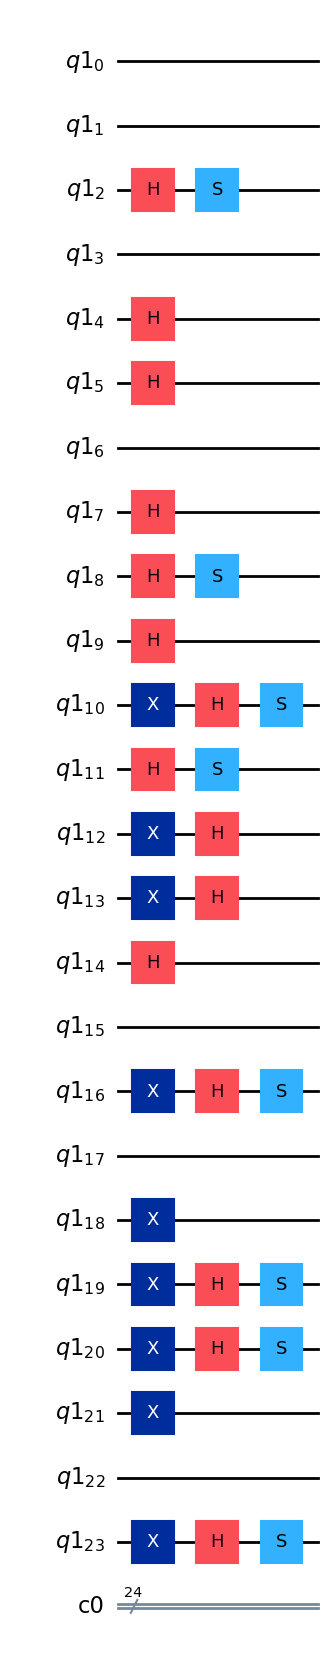

In [2]:
#Apply X gate if bit is equal to 1
for i, n in enumerate(send):
    if n==1:
        asja.x(qreg[i]) # apply x-gate
for i, k in enumerate(asja_basis): 
    if k=='X':
        asja.h(qreg[i])
    if k=="Y":
        asja.h(qreg[i])
        asja.s([qreg[i]])
            
        send_str = ''.join(str(e) for e in send)



asja.draw("mpl") #To check gates applied correctly

Balvis measuring the sent states in random basis(X,Y,Z)

['\nx q1[10]', '\nx q1[12]', '\nx q1[13]', '\nx q1[16]', '\nx q1[18]', '\nx q1[19]', '\nx q1[20]', '\nx q1[21]', '\nx q1[23]', '\nh q1[2]', '\ns q1[2]', '\nh q1[4]', '\nh q1[5]', '\nh q1[7]', '\nh q1[8]', '\ns q1[8]', '\nh q1[9]', '\nh q1[10]', '\ns q1[10]', '\nh q1[11]', '\ns q1[11]', '\nh q1[12]', '\nh q1[13]', '\nh q1[14]', '\nh q1[16]', '\ns q1[16]', '\nh q1[19]', '\ns q1[19]', '\nh q1[20]', '\ns q1[20]', '\nh q1[23]', '\ns q1[23]']


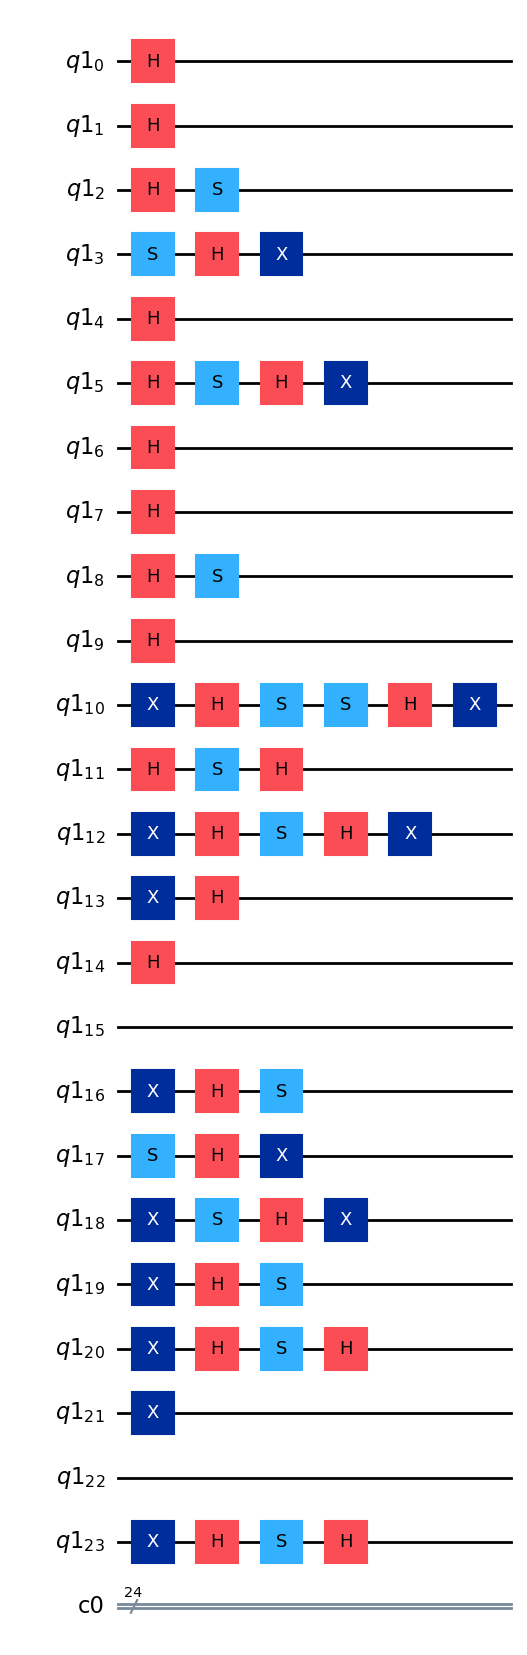

In [3]:
balvis = QuantumCircuit(qreg, creg, name='Balvis') #Defining Balvis circuit
SendState(asja, balvis, 'Asja') #Asja sends states to Balvis

for i, k in enumerate(balvis_basis): 
    if k=='X':
        balvis.h(qreg[i])
    if k=="Y":
        balvis.s(qreg[i])
        balvis.h(qreg[i])
        balvis.x(qreg[i])


            

balvis.draw("mpl")

Backend measurnig of qubits in computational basis

In [4]:
balvis.measure(qreg,creg)

job = assemble(balvis)
result = Aer.get_backend('qasm_simulator').run(job).result()
counts = result.get_counts(balvis)
received = print_outcomes_in_reserve(counts)

print("Asja sent:", send_str)
print("Balvis received:", received)


Asja sent: 000000000010110010111101
Balvis received: 111000111011111010001100


C:\Users\dell\AppData\Local\Temp\ipykernel_15204\2688098230.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = Aer.get_backend('qasm_simulator').run(job).result()


The sifted key Balvis and And would keep

In [5]:

asja_key=[] #Asjas register for matching rounds
balvis_key=[] #Balvis register for matching rounds
for j in range(0,len(asja_basis)): #Going through list of bases 
    if asja_basis[j] == balvis_basis[j]: #Comparing
        asja_key.append(send[j])
        balvis_key.append(received[j]) #Keeping key bit if bases matched
    else:
        pass #Discard round if bases mismatched
balvis_key = [eval(i) for i in balvis_key]

print("Asjas key =", asja_key)
print("Balvis key =", balvis_key)
        

Asjas key = [1, 0, 1, 0]
Balvis key = [1, 0, 1, 0]


In this protocol there was no evesdropping so both the Asja and Balvis keys are identical.



## Home work
#### How can we introduce Bit-FLip errors in this protocol?
### Hint
You can do some some changes in the sendstate function define in the first part of this protocol.

You can check the answer here.

[Answer](six_stats_with_bit_flip_errors.ipynb)

